# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

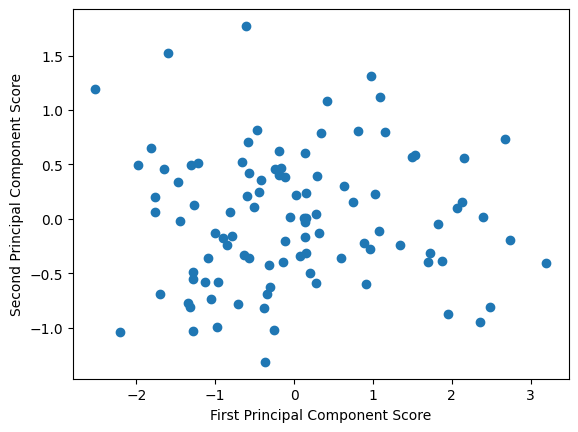

In [2]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

-Three outliers: The three outliers in the upper left corner of the scatter plot have low scores for the first principal component (PC1) and high scores for the second principal component (PC2). Their positions indicate significant deviations in their principal component scores compared to the majority of the data points. Their low first principal component scores suggest that they exhibit markedly low contributions from the main source of variance in the dataset, which, as revealed by the PCA loadings, is heavily influenced by series_3. This implies that these outliers likely have low values in series_3 relative to other data points. Their high second principal component scores suggest a strong alignment with the secondary source of variance, which captures the contributions of series_1 and series_2. Given the positive loadings of these two series on PC2, these outliers likely exhibit higher values for series_1 and series_2.

-First principal component score: The first principal component score for the three outliers in the upper left corner of the scatter plot is low, meaning it is significantly smaller than the PC1 scores for most of the data points. Since PC1 accounts for approximately 80% of the dataset's variance and is heavily influenced by series_3 based on the PCA loadings, a low PC1 score suggests that these outliers have substantially reduced contributions from series_3. Essentially, the low PC1 score indicates that series_3 has values much smaller than those seen in the rest of the dataset.

-Second principal component score: The points have high second principal component scores, meaning their values are significantly larger compared to the PC2 scores for most of the other data points. PC2 accounts for approximately 19% of the dataset's variance and, based on the PCA loadings, is influenced primarily by series_1 and series_2, with smaller contributions from series_3. Specifically, series_1 and series_2 have strong positive loadings in PC2, while series_3 has a negative loading, indicating that a high PC2 score corresponds to higher contributions from series_1 and series_2 and lower contributions from series_3.

-Values in series_1, series_2, and series_3: The low PC1 scores imply that these outliers have low contributions from series_3, as PC1 is dominated by series_3. On the other hand, their high PC2 scores suggest that series_1 and series_2 contribute positively to these data points. However, it is challenging to isolate their exact values for series_1 and series_2 without more information, as these variables contribute to both PC1 and PC2.

-Why is that?: Yes, we can infer that these outliers have relatively low values in series_3, as PC1 is heavily influenced by series_3 and the outliers have low PC1 scores. It is harder to make conclusions about series_1 and series_2 because they contribute to both PC1 and PC2 in varying proportions. Determining their relative values is nearly impossible because PCA combines their contributions into linear combinations, making it difficult to disentangle their individual effects without additional context.

-How are series_1 and series_2 related?: Series_1 and series_2 were created with a positive correlation, as series_2 is derived from series_1 with added noise. This means that in most cases, as the value of series_1 increases, the value of series_2 is likely to increase proportionally, though there may be some deviation due to the random noise.

-Advantages and disadvantages: The scatter plot of the first two principal components effectively reduces the dimensionality of the dataset, highlighting patterns such as clusters or outliers. Its main advantage is providing a simplified view of the data's structure. However, a disadvantage is the difficulty in interpreting the original variables without knowing the loadings of the principal components. The graph reveals an interesting pattern, specifically the three outliers in the upper left corner, which deviate significantly from the general distribution. This anomaly may suggest unique characteristics or potential issues in the data that warrant further investigation.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [10]:
import kagglehub

path = kagglehub.dataset_download("ritwikb3/heart-disease-statlog")

print("Path to dataset files:", path)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.19k/3.19k [00:00<00:00, 9.43MB/s]

Extracting files...
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/ritwikb3/heart-disease-statlog/versions/1


In [11]:
import os

dataset_path = "/home/codespace/.cache/kagglehub/datasets/ritwikb3/heart-disease-statlog/versions/1"
print(os.listdir(dataset_path))

['Heart_disease_statlog.csv']


In [12]:
import pandas as pd

file_path = f"{dataset_path}/Heart_disease_statlog.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   3       130   322    0        2      109      0      2.4      1   
1   67    0   2       115   564    0        2      160      0      1.6      1   
2   57    1   1       124   261    0        0      141      0      0.3      0   
3   64    1   3       128   263    0        0      105      1      0.2      1   
4   74    0   1       120   269    0        2      121      1      0.2      0   

   ca  thal  target  
0   3     1       1  
1   0     3       0  
2   0     3       1  
3   1     3       0  
4   1     1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5 

Analysis:

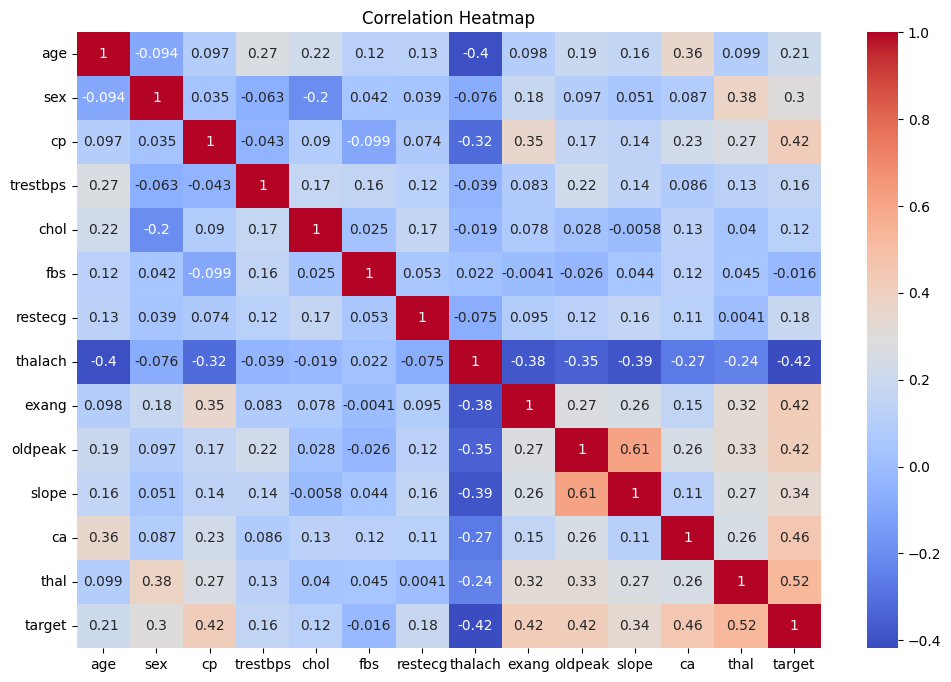

In [14]:
#heatmaps

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

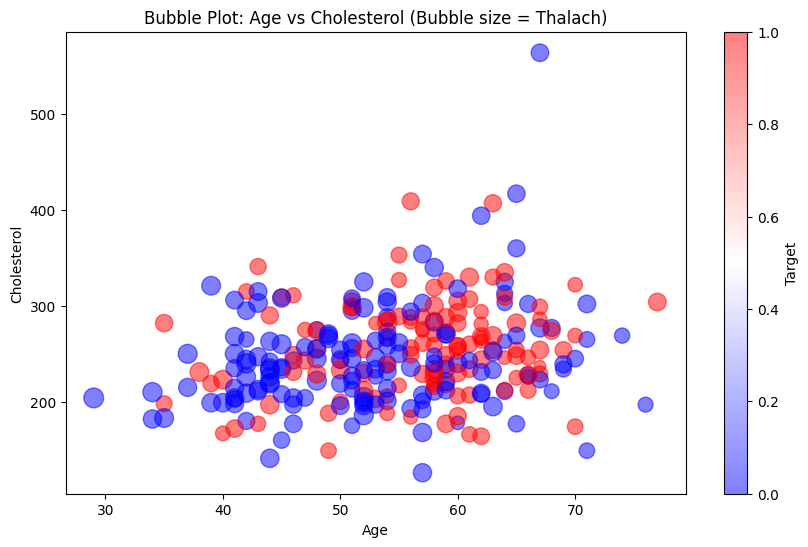

In [15]:
#bubble plot

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['chol'], s=df['thalach'], alpha=0.5, c=df['target'], cmap='bwr')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Bubble Plot: Age vs Cholesterol (Bubble size = Thalach)")
plt.colorbar(label='Target')
plt.show()

Explained variance ratio: [0.23359427 0.12341048 0.09510698 0.08936529 0.07798919 0.07036284
 0.063588   0.05790212 0.05209499 0.04417323 0.03523648 0.03097742
 0.02619871]


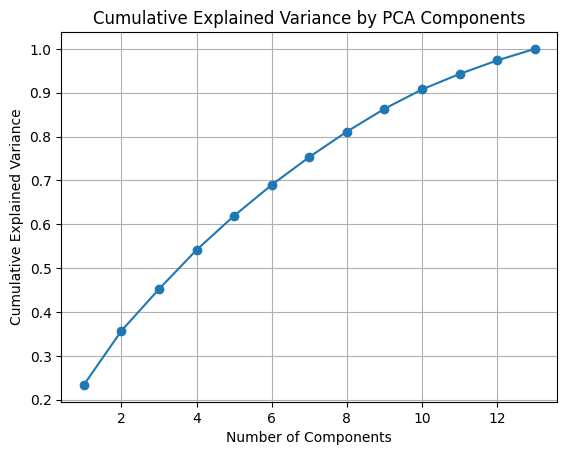

In [16]:
#principal component analysis (PCA)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df.drop('target', axis=1)
features_scaled = StandardScaler().fit_transform(features)

pca = PCA()
pca_components = pca.fit_transform(features_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [17]:
df['PCA1'] = pca_components[:, 0]

In [18]:
#linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[['age', 'chol', 'thalach']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.2471939550375507


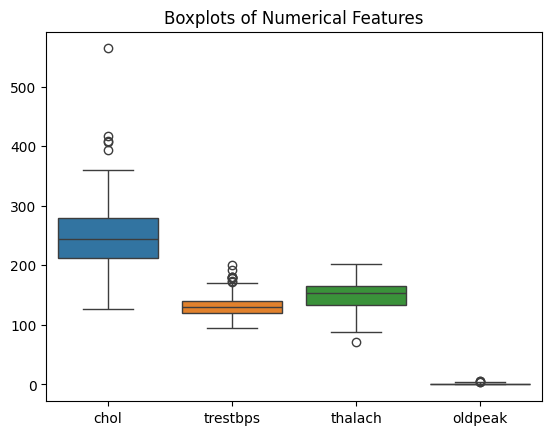

Number of outliers: 9


In [20]:
#check for outliers

sns.boxplot(data=df[['chol', 'trestbps', 'thalach', 'oldpeak']])
plt.title("Boxplots of Numerical Features")
plt.show()

from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))
outliers = (abs(z_scores) > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

Conclusions:

-Are the data what you expect? Are the data likely to be usable?: The analysis suggests that the data has useful insights, but certain limitations need to be addressed. The heatmap revealed meaningful correlations between variables, such as age and maximum heart rate, that align with health-related patterns. The bubble plot provides visually intuitive insights into age, cholesterol, heart rate, and target classifications. However, the linear regression model yielded an R² score of 0.247, indicating that the model’s explanatory power is relatively low. This suggests missing predictors, non-linear relationships, or multicollinearity might be affecting the analysis. Despite these challenges, the data is still usable after refinement. Addressing outliers, feature engineering, and possibly adopting non-linear models could enhance usability. Overall, while the dataset may require improvements, it is feasible to proceed with analysis rather than discarding it for new data.

-Do you see any outliers?: Yes, there are 9 identified outliers in the dataset, particularly in features like cholesterol (chol), resting blood pressure (trestbps), maximum heart rate achieved (thalach), and ST depression (oldpeak). Notably, cholesterol values exceeding 400 are among the most extreme. These outliers may either reflect meaningful anomalies such as rare health conditions or errors. Their presence affects statistical metrics, such as mean and variance, and potentially skews model performance. It’s essential to determine whether these outliers represent genuine variability or inaccuracies. Visualization techniques, like scatter plots, can assist in understanding their behavior, and transforming or excluding them might improve analytical outcomes.

-Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?: The Principal Component Analysis (PCA) indicates that dimensionality reduction is viable. The explained variance ratios show that the first principal component captures 23.36% of the data’s variability, and the first two components combined account for approximately 35.68%. To preserve around 75–80% of variance, around 6–8 principal components are recommended. While reducing the dataset to just one or two components might oversimplify it, representing the data with fewer dimensions (up to 6–8 components) balances efficiency and information retention. This approach is particularly useful for clustering, visualization, or preprocessing steps in predictive modeling.

-Try using your correlation information from previous weeks to help choose features for linear regression: Based on correlation information, features strongly correlated with the target variable should be prioritized for linear regression. According to the heatmap, predictors like age and thalach exhibit notable relationships. However, near-zero correlations, such as weak relationships with certain features, may add noise rather than explanatory power to the model. Incorporating features with moderate or strong correlations can improve model performance. Additionally, addressing multicollinearity among predictors is crucial to ensure the regression model accurately identifies variable contributions. Regularization techniques like Ridge or Lasso regression may help refine feature selection and enhance predictive accuracy.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

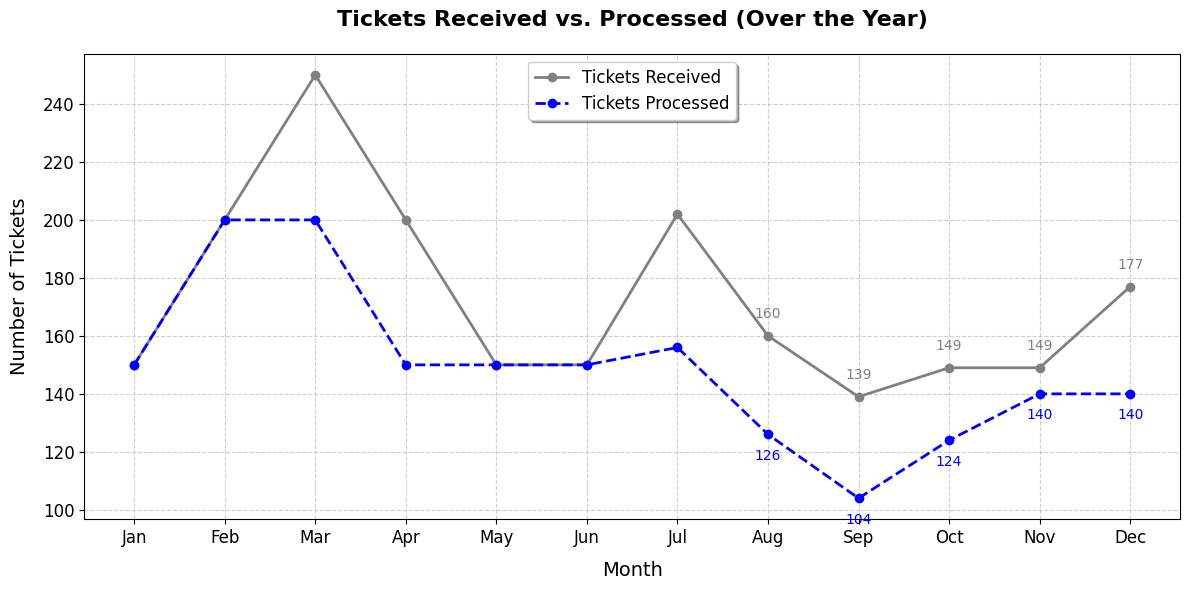

In [8]:
#figure 5.8

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
received = [150, 200, 250, 200, 150, 150, 202, 160, 139, 149, 149, 177]
processed = [150, 200, 200, 150, 150, 150, 156, 126, 104, 124, 140, 140]

x = np.arange(len(months))

plt.figure(figsize=(12, 6))
plt.plot(x, received, marker='o', color='gray', linestyle='solid', linewidth=2, label="Tickets Received")
plt.plot(x, processed, marker='o', color='blue', linestyle='dashed', linewidth=2, label="Tickets Processed")

for i in range(7, len(x)):
    plt.text(x[i], received[i] + 5, str(received[i]), color='gray', fontsize=10, ha='center', va='bottom')
    plt.text(x[i], processed[i] - 5, str(processed[i]), color='blue', fontsize=10, ha='center', va='top')

plt.title("Tickets Received vs. Processed (Over the Year)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Month", fontsize=14, labelpad=10)
plt.ylabel("Number of Tickets", fontsize=14, labelpad=10)
plt.xticks(x, months, fontsize=12)
plt.yticks(np.arange(100, 260, 20), fontsize=12)
plt.legend(loc='upper center', fontsize=12, frameon=True, shadow=True)
plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.6)

plt.tight_layout()
plt.show()